In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [18]:
"""Wrapper that returns training data for the Boston house prices dataset"""
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA # to visualize our data
from sklearn.preprocessing import normalize # to standardize our data
from sklearn.model_selection import train_test_split

def get_data():
	data, targets = load_boston(True)
	data = normalize(data)
	targets = targets.reshape((targets.shape[0],1)) # reshape targets to follow our variables
	X_train, X_test, y_train, y_test = train_test_split(data, targets, 
	                                                    test_size = 0.3, random_state = 42)
	return X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = get_data()

In [20]:
print(",".join([str(t.shape) for t in (X_train, X_test, y_train, y_test)]))

(354, 13),(152, 13),(354, 1),(152, 1)


In [21]:
crime_rates, prices = [X_train[i][0] for i in range (X_train.shape[0])],y_train.tolist()
student_teacher_ratio = [X_train[i][10] for i in range(X_train.shape[0])]
rooms = [X_train[i][5] for i in range(X_train.shape[0])]


In [22]:
# Create placeholders for X and y, our features and targets, respectively
X = tf.placeholder(tf.float32, shape = [None,13])
y = tf.placeholder(tf.float32, shape = [None,1])

# Create variables for W and b, and initialize them with constants
W = tf.Variable(tf.constant(0.1, shape=[13,1]))
b = tf.Variable(tf.constant(0.1))


In [23]:
# Use tensorflow to write out the linear regression model and assign it to a variable y_pred
# y_pred = ..
y_pred = tf.matmul(X,W)+b
loss = tf.reduce_mean(tf.square(y_pred - y))
opt = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

In [24]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
initial_loss = loss.eval(feed_dict={X:X_train, y : y_train})
print("initial loss: {}".format(initial_loss))


initial loss: 605.6507568359375


In [27]:
for i in range(5000):
    # Run optimization step with the training data passed in
    sess.run(opt, feed_dict={X:X_train, y:y_train})
    if( i % 100) == 0:
        # Print the current error of the model so we can know how the model is doing while training
        print("current loss: {}".format(loss.eval(feed_dict={X:X_train, y:y_train})))
        
# Evaluate and print the final loss on the training and testing datasets.

current loss: 46.39813232421875
current loss: 46.19076156616211
current loss: 45.98733901977539
current loss: 45.78779220581055
current loss: 45.592044830322266
current loss: 45.40000915527344
current loss: 45.21162796020508
current loss: 45.026817321777344
current loss: 44.84550476074219
current loss: 44.66762161254883
current loss: 44.49310302734375
current loss: 44.321876525878906
current loss: 44.15388107299805
current loss: 43.98904800415039
current loss: 43.82732009887695
current loss: 43.66862106323242
current loss: 43.51290512084961
current loss: 43.360103607177734
current loss: 43.210166931152344
current loss: 43.06302261352539
current loss: 42.91863250732422
current loss: 42.77693176269531
current loss: 42.63787078857422
current loss: 42.50139617919922
current loss: 42.36745071411133
current loss: 42.235984802246094
current loss: 42.10695266723633
current loss: 41.980316162109375
current loss: 41.85600662231445
current loss: 41.73398971557617
current loss: 41.614219665527344


In [30]:
data,targets = X_test, y_test
predictions = sess.run(y_pred, feed_dict={X:data})
predictions = predictions.flatten()
targets = targets.reshape((152))

#lets take a look at some predictions
for i in range(10):
    randint = np.random.randint(0,152)
    pred = predictions[randint]
    actual = targets[randint]
    print("predictions: {}, actual was: {}".format(pred, actual))
    
    


predictions: 27.383995056152344, actual was: 24.1
predictions: 29.327556610107422, actual was: 23.1
predictions: 23.828163146972656, actual was: 17.6
predictions: 26.076751708984375, actual was: 24.6
predictions: 22.696502685546875, actual was: 23.7
predictions: 21.979896545410156, actual was: 16.8
predictions: 36.49875259399414, actual was: 50.0
predictions: 20.81909942626953, actual was: 29.8
predictions: 19.711631774902344, actual was: 19.9
predictions: 20.81909942626953, actual was: 29.8


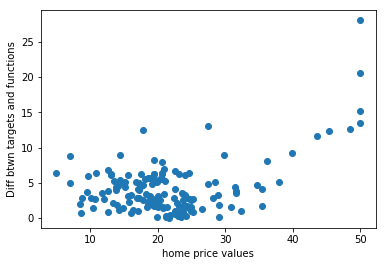

average absolute difference: 4184.991743690089
average house price: 21407.894736842107


In [31]:
diffs = abs(targets - predictions)
avg_diffs = np.mean(diffs)
avg_houseprice = np.mean(targets)
plt.xlabel("home price values")
plt.ylabel("Diff btwn targets and functions")
plt.scatter(targets, diffs)
plt.show()
print("average absolute difference: {}".format(avg_diffs * 1000))
print("average house price: {}".format(avg_houseprice * 1000))


In [33]:
price_buckets = [0, 10, 20, 30, 40, 50]
limits = dict(zip(price_buckets, [0 for _ in range(len(price_buckets))]))
print(limits)


{0: 0, 10: 0, 20: 0, 30: 0, 40: 0, 50: 0}


In [34]:
for price in targets:
    limits[int(price/10)*10]+=1
    
for k,v in sorted(limits.items()):
    print("{} : {}".format(k,v))

0 : 8
10 : 66
20 : 60
30 : 11
40 : 3
50 : 4
